In [116]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import preprocessing
%matplotlib inline
sns.set()
sns.set_style('white')
warnings.filterwarnings('ignore')

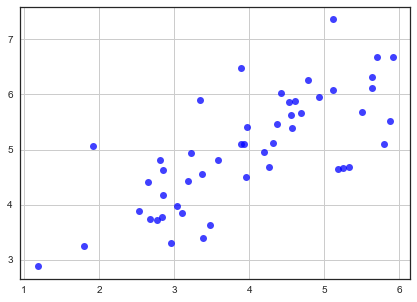

In [117]:
data1 = loadmat('ex7data1.mat')
X = data1['X']
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)

In [118]:
def normalizer (x):
    return preprocessing.scale(x)

In [119]:
def covariance (x):
    return np.cov(x)

In [120]:
def SVD (x):
    return sc.linalg.svd(x)

In [121]:
normalX = normalizer(X)
covarianceX = covariance(normalX.T)
U, S, V = SVD(covarianceX)

In [122]:
mean = np.mean(X, axis = 0)

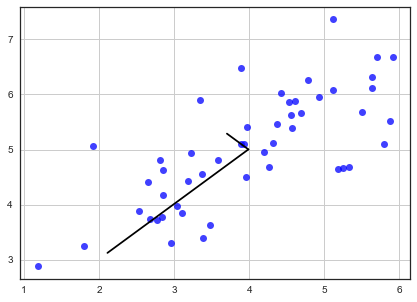

In [123]:
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)
plt.plot([mean[0], mean[0] + 1.5 * S[0] * U[0, 0]], [mean[1], mean[1] + 1.5 * S[0] * U[0, 1]], color = 'k')
plt.plot([mean[0], mean[0] + 1.5 * S[1] * U[1, 0]], [mean[1], mean[1] + 1.5 * S[1] * U[1, 1]], color = 'k')

In [124]:
def projectData (x, u, k):
    return np.dot(x, u[:, :k])

In [125]:
def recoverData (z, u, k):
    return np.dot(z, u[:, :k].T)

In [126]:
Z = projectData(normalX, U, 1)
xAprrox = recoverData(Z, U, 1)

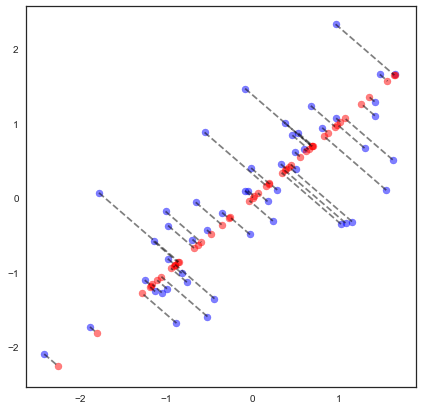

In [127]:
plt.figure(figsize = (7, 7))
plt.scatter(normalX[:, 0], normalX[:, 1], s = 50, color = 'b', alpha = 0.5, edgecolors = 'b')
plt.scatter(xAprrox[:, 0], xAprrox[:, 1], s = 50, color = 'r', alpha = 0.5, edgecolors = 'r')
for number in range(len(xAprrox)):
    plt.plot([normalX[number, 0], xAprrox[number, 0]], [normalX[number, 1], xAprrox[number, 1]], 'k--', alpha = 0.5)

In [128]:
data = loadmat('ex7faces')
X = data['X']

In [129]:
def getDatumImg(row):
    width, height = 32, 32
    square = row.reshape(width, height)
    return square.T

def displayData(x, nrows = 10, ncols = 10):
    width, height = 32, 32
    nrows, ncols = nrows, ncols
    big_picture = np.zeros((height * nrows, width * ncols))
    irow, icol = 0, 0
    for idx in range(nrows * ncols):
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(x[idx])
        big_picture[irow * height: irow * height + iimg.shape[0], icol * width: icol * width + iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize = (10, 10))
    plt.imshow(big_picture, cmap = 'Greys_r')

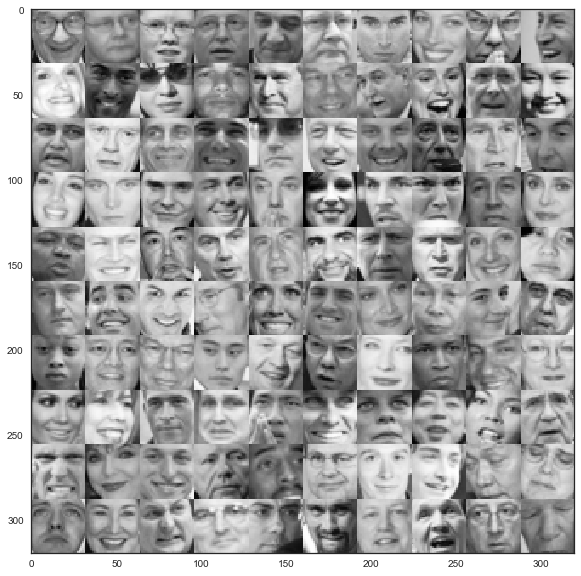

In [130]:
displayData(X, nrows = 10, ncols = 10)

In [131]:
normalX = normalizer(X)
covarianceX = covariance(normalX.T)
U, S, V = SVD(covarianceX)

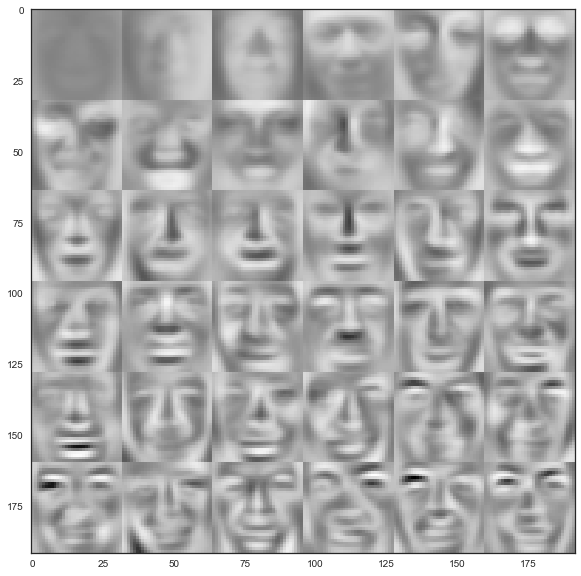

In [132]:
displayData(U[:, :36].T, nrows = 6, ncols = 6)

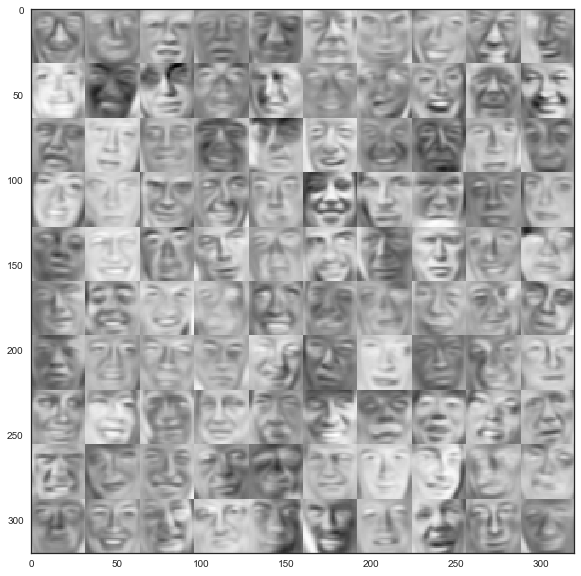

In [133]:
Z = projectData(normalX, U, 100)
xAprrox = recoverData(Z, U, 100)
displayData(xAprrox)

In [138]:
image = plt.imread('bird_small.png')
image = image.reshape(-1, 3)
normalImage = normalizer(image)
covarianceImage = covariance(normalImage.T)
U, S, V = SVD(covarianceImage)
Z = projectData(normalImage, U, 2)